In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [4]:
!kaggle datasets download -d bhanupratapbiswas/app-users-segmentation-case-study

  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 25.4MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  app-users-segmentation-case-study.zip
  inflating: user behaviour/userbehaviour.csv  


In [6]:
df = pd.read_csv("user behaviour/userbehaviour.csv",index_col = 0)
df.head(20)

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
userid,,,,,,,
1001,17.0,634.0,1,9,7,2990,Installed
1002,0.0,54.0,0,4,8,24008,Uninstalled
1003,37.0,207.0,0,8,5,971,Installed
1004,32.0,445.0,1,6,2,799,Installed
1005,45.0,427.0,1,5,6,3668,Installed
1006,28.0,599.0,0,9,4,2878,Installed
1007,49.0,887.0,1,9,6,4481,Installed
1008,8.0,31.0,0,2,1,1715,Installed
1009,28.0,741.0,1,8,2,801,Installed


In [7]:
df.isnull().sum()

Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [8]:
df.shape

(999, 7)

In [9]:

df.reset_index(drop=True, inplace=True)
df.head()


,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,17.0,634.0,1,9,7,2990,Installed
1,0.0,54.0,0,4,8,24008,Uninstalled
2,37.0,207.0,0,8,5,971,Installed
3,32.0,445.0,1,6,2,799,Installed
4,45.0,427.0,1,5,6,3668,Installed


In [10]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,17.0,634.0,1,9,7,2990,0
1,0.0,54.0,0,4,8,24008,1
2,37.0,207.0,0,8,5,971,0
3,32.0,445.0,1,6,2,799,0
4,45.0,427.0,1,5,6,3668,0


In [11]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[-0.51941528,  0.6712951 ,  1.00501759, ...,  0.73944904,
        -0.24696836, -0.3010172 ],
       [-1.71421816, -1.18643293, -0.99500746, ...,  1.09874359,
         2.20047554,  3.32206932],
       [ 0.88623517, -0.69637709, -0.99500746, ...,  0.02085994,
        -0.4820711 , -0.3010172 ],
       ...,
       [ 1.58906039,  1.07807348, -0.99500746, ..., -1.41631825,
        -0.36970154, -0.3010172 ],
       [-1.29252302, -1.12557633,  1.00501759, ..., -1.41631825,
        -0.19503383, -0.3010172 ],
       [-1.08167546, -1.18643293, -0.99500746, ..., -1.0570237 ,
        -0.12481742, -0.3010172 ]])

In [12]:
# Normalleştirme, gerçek değerli sayısal niteliklerin 0 ve 1 aralığına yeniden ölçeklendirilmesi anlamına gelir.
# Uzaklık ölçümlerinde kullanılan değerler gibi değerlerin büyüklüğüne dayanan bir model için girdi niteliklerini ölçeklendirmek faydalıdır.
norm=normalize(df_std)
norm

array([[-0.28693584,  0.37083742,  0.55519269, ...,  0.40848708,
        -0.13643048, -0.16628818],
       [-0.3552205 , -0.24585278, -0.20618557, ...,  0.22768178,
         0.45598281,  0.68839962],
       [ 0.52159436, -0.40985325, -0.58561238, ...,  0.01227714,
        -0.2837233 , -0.17716389],
       ...,
       [ 0.60290329,  0.40903043, -0.37751446, ..., -0.53736343,
        -0.14026797, -0.11420853],
       [-0.51105849, -0.44504843,  0.39737998, ..., -0.56000663,
        -0.07711561, -0.11902101],
       [-0.45475431, -0.4987961 , -0.41831765, ..., -0.44439031,
        -0.05247531, -0.12655263]])

In [31]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()


In [32]:
pca.fit(df_std)

PCA()

In [33]:
pca.explained_variance_ratio_

array([0.46294154, 0.15324337, 0.14413427, 0.08778488, 0.07807134,
       0.06225547, 0.01156913])

Text(0, 0.5, 'Cumulative Explained Variance')

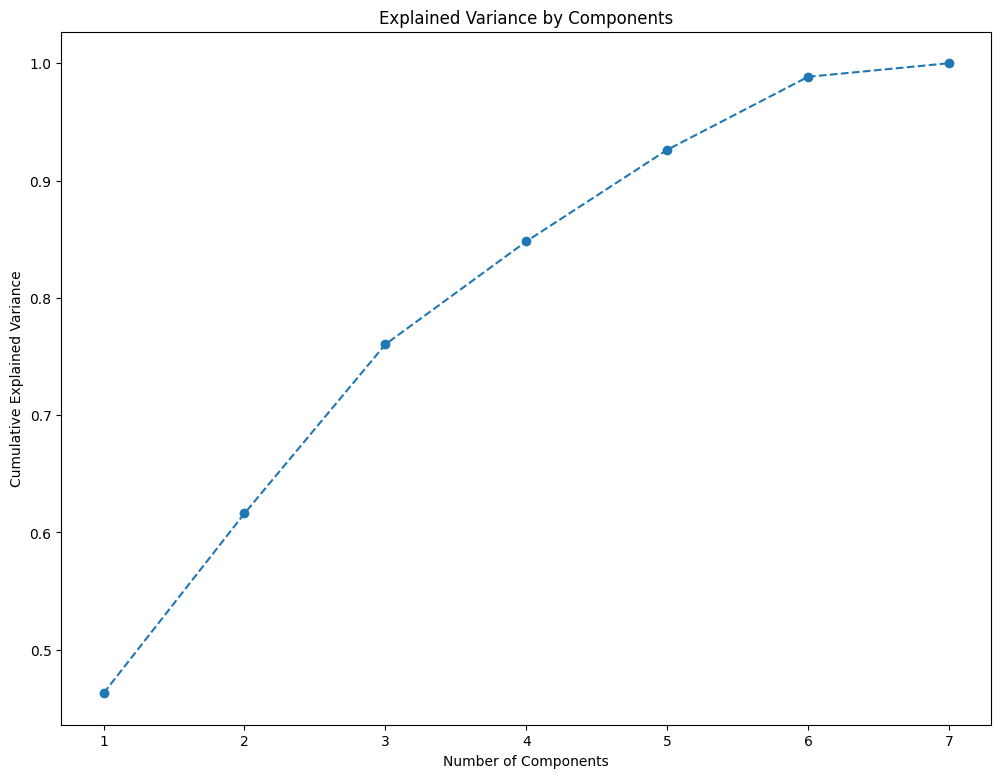

In [36]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep.
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [37]:
pca = PCA(n_components = 4)

In [38]:
pca.fit(df_std)

PCA(n_components=4)

# Sonuç

In [39]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pca.components_

array([[-0.40231146, -0.34624274,  0.0102313 , -0.3897469 ,  0.32534133,
         0.47474191,  0.48479612],
       [-0.34375187, -0.46509211, -0.07918763, -0.44625908, -0.5029554 ,
        -0.32008298, -0.32355661],
       [ 0.04380093,  0.08159939, -0.98499359,  0.0120428 , -0.07393285,
         0.08433707,  0.09212386],
       [-0.13708728,  0.48548511,  0.14397598, -0.0878784 , -0.71213871,
         0.35535352,  0.28920912]])

In [41]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca_comp

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
Component 1,-0.402311,-0.346243,0.010231,-0.389747,0.325341,0.474742,0.484796
Component 2,-0.343752,-0.465092,-0.079188,-0.446259,-0.502955,-0.320083,-0.323557
Component 3,0.043801,0.081599,-0.984994,0.012043,-0.073933,0.084337,0.092124
Component 4,-0.137087,0.485485,0.143976,-0.087878,-0.712139,0.355354,0.289209


([<matplotlib.axis.YTick at 0x7e39346733d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

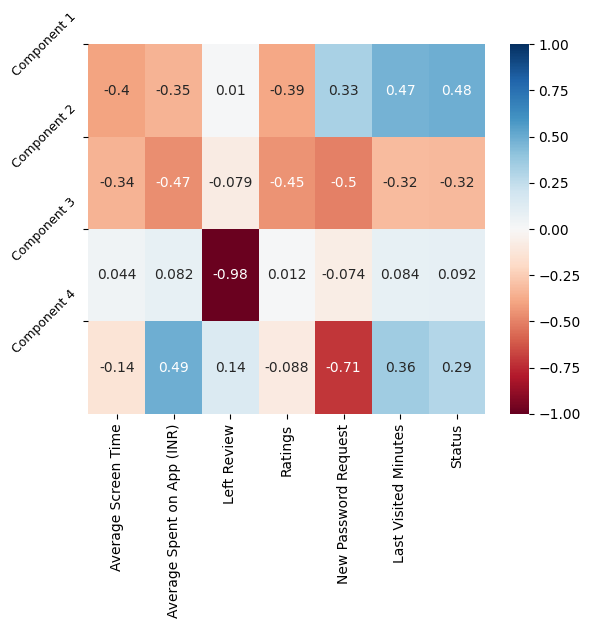

In [47]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3],
           ['Component 1', 'Component 2', 'Component 3', 'Component 4'],
           rotation = 45,
           fontsize = 9)

In [64]:
df.columns

Index(['Average Screen Time', 'Average Spent on App (INR)', 'Left Review',
       'Ratings', 'New Password Request', 'Last Visited Minutes', 'Status'],
      dtype='object')

In [ ]:
['Ortalama Ekran Süresi', 'Uygulamada Harcanan Ortalama (INR)', 'Sol İnceleme',
        'Derecelendirmeler', 'Yeni Şifre Talebi', 'Son Ziyaret Edilen Dakikalar', 'Durum']

In [44]:
pca.transform(df_std)

array([[-0.39469151, -0.81965759, -1.0500487 , -0.24052518],
       [ 4.46572023, -0.69656081,  1.20735932,  0.55781035],
       [-0.70817473,  0.0935603 ,  0.89877017, -0.92442586],
       ...,
       [-1.7308625 ,  0.04409163,  1.18116017,  0.9691875 ],
       [ 0.43915639,  2.01052746, -1.08461326,  0.67694675],
       [ 0.64950855,  2.08681658,  0.8645662 ,  0.13217142]])

# K-means clustering with PCA

In [49]:
scores_pca = pca.transform(df_std)

In [51]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

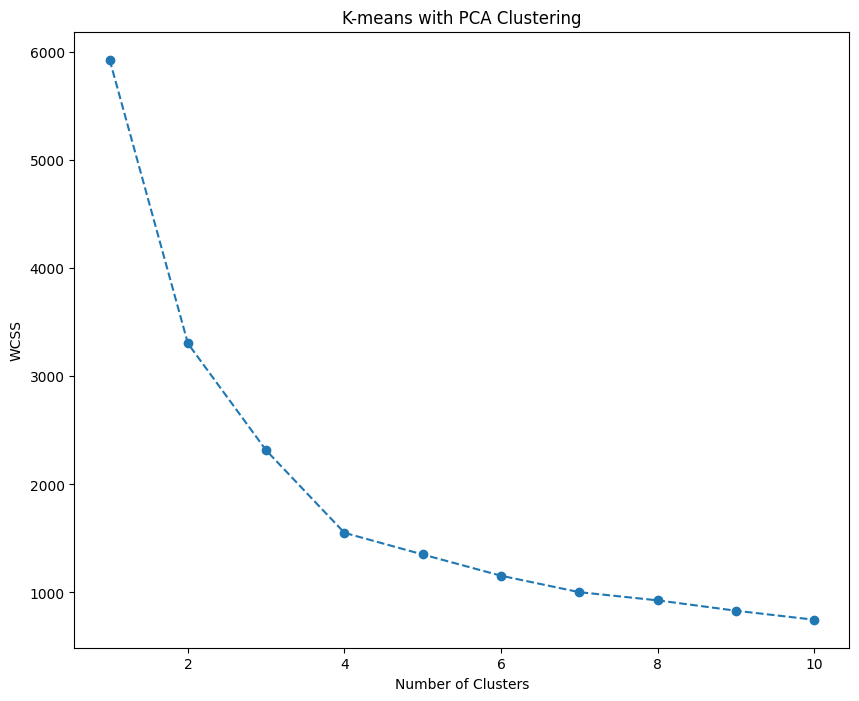

In [52]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [53]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [54]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

# K-means clustering with PCA Results

In [60]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [61]:
df_segm_pca_kmeans

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,17.0,634.0,1,9,7,2990,0,-0.394692,-0.819658,-1.050049,-0.240525,1
1,0.0,54.0,0,4,8,24008,1,4.465720,-0.696561,1.207359,0.557810,2
2,37.0,207.0,0,8,5,971,0,-0.708175,0.093560,0.898770,-0.924426,0
3,32.0,445.0,1,6,2,799,0,-0.881783,0.580519,-0.955348,0.607370,1
4,45.0,427.0,1,5,6,3668,0,-0.458884,-0.371242,-1.002572,-0.418080,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,38.0,938.0,0,5,4,1865,0,-1.181580,-0.376354,1.114867,0.593141,0
995,43.0,61.0,0,6,8,1327,0,-0.056868,-0.058758,0.793967,-1.897045,0
996,47.0,761.0,0,6,1,1936,0,-1.730863,0.044092,1.181160,0.969187,0
997,6.0,73.0,1,5,1,3436,0,0.439156,2.010527,-1.084613,0.676947,3


In [62]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,
0,30.128205,536.046154,0.000000,7.610256,4.346154,2549.779487,0.0,-0.811683,-0.106867,0.994751,-0.101240
1,29.766404,530.406824,1.000000,7.706037,4.711286,2581.367454,0.0,-0.744134,-0.331093,-0.986811,0.086197
2,2.277108,52.024096,0.469880,2.542169,9.662651,31264.277108,1.0,5.219057,-1.153025,0.308778,0.590389
3,7.489655,58.827586,0.531034,2.703448,4.448276,3675.434483,0.0,1.150963,1.817419,-0.259354,-0.292137


In [66]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Ratings']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Etkileşim',
                                                          1:'Geribildirim',
                                                          2:'Bağlılık',
                                                          3:'Güvenlik'})
df_segm_pca_kmeans_freq

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
Etkileşim,30.128205,536.046154,0.000000,7.610256,4.346154,2549.779487,0.0,-0.811683,-0.106867,0.994751,-0.101240,390,0.390390
Geribildirim,29.766404,530.406824,1.000000,7.706037,4.711286,2581.367454,0.0,-0.744134,-0.331093,-0.986811,0.086197,381,0.381381
Bağlılık,2.277108,52.024096,0.469880,2.542169,9.662651,31264.277108,1.0,5.219057,-1.153025,0.308778,0.590389,83,0.083083
Güvenlik,7.489655,58.827586,0.531034,2.703448,4.448276,3675.434483,0.0,1.150963,1.817419,-0.259354,-0.292137,145,0.145145


In [67]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
                                                         {0:'Etkileşim',
                                                          1:'Geribildirim',
                                                          2:'Bağlılık',
                                                          3:'Güvenlik'})

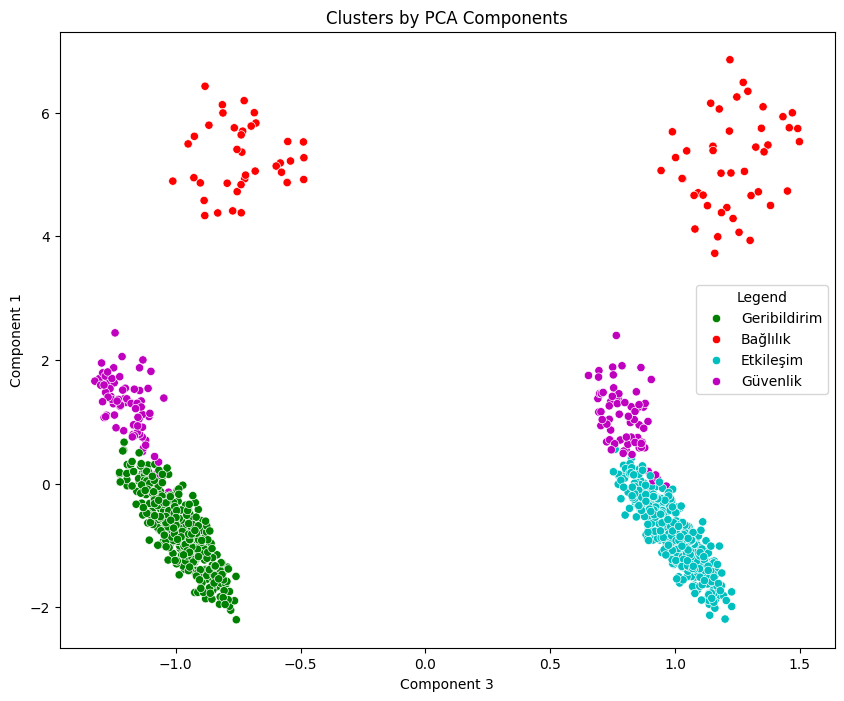

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri çerçevesi ve PCA bileşenlerini varsayıyoruz
# df_segm_pca_kmeans['Component 2'] ve df_segm_pca_kmeans['Component 1'] mevcut ve doğru
# df_segm_pca_kmeans['Legend'] sütunu da mevcut ve kategorik veri içeriyor

plt.figure(figsize = (10, 8))
sns.scatterplot(x='Component 3', y='Component 1', hue='Legend', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()


In [72]:
import pickle

In [73]:
# We save the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [74]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [75]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))